<a href="https://colab.research.google.com/github/cff100/MecFLu2/blob/main/Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
from IPython.display import display



In [28]:
data = '/content/2023_DataFrame.csv'

# Criação do DataFrame
df = pd.read_csv(data)

In [29]:
# Lista dos horários em ordem
horarios = ['03:00', '09:00', '15:00', '21:00']

# Para facilitar o uso dos nomes
nome_h_brasilia = "Horário_Brasília"
nome_altura = "Altitude_m"
nome_velocidade_vento = "Velocidade_Vento_m/s"

plataformas_existentes = ["NAMORADO 2 (PNA-2)", "PETROBRAS 26 (P-26)", "PETROBRAS 32 (P-32)", "PETROBRAS 37 (P-37)", "PETROBRAS IX", "PETROBRAS XIX", "PETROBRAS XXXIII", "VERMELHO 1 (PVM-1)", "VERMELHO 2 (PVM-2)"]
estacoes_existentes = ["Verão", "Outono", "Inverno", "Primavera"]

In [30]:
# GUARDAR TODOS OS GRÁFICOS DE ALTURA X VELOCIDADE EM UM DICIONÁRIO PARA FACILITAR O ACESSO POSTERIOR

dic_estacoes = {est: {'grafico_original': None, 'grafico_derivada': None} for est in estacoes_existentes}
graficos_plataformas = {plat: dic_estacoes.copy() for plat in plataformas_existentes}

for a, plataforma_exist in enumerate(plataformas_existentes):

  df_filtra_plataforma = df[df['Plataforma'] == plataforma_exist]

  for b, estacao_exist in enumerate(estacoes_existentes):

    df_filtra_estacao = df_filtra_plataforma[df_filtra_plataforma["Estação_do_Ano"] == estacao_exist]

    # Cria uma figura para o gráfico original
    fig_original, ax_original = plt.subplots(figsize=(9, 6))

    # Cria uma figura para o gráfico da derivada
    fig_derivada, ax_derivada = plt.subplots(figsize=(9, 6))

    # Cores para cada horário
    cores = ['blue', 'green', 'red', 'purple']

    # Plotar os perfis de velocidade para cada horário
    for c, horario in enumerate(horarios):

      # Filtra os dados para o horário específico
      df_filtra_hora = df_filtra_estacao[df_filtra_estacao[nome_h_brasilia] == horario]

      # Ordena os dados por altitude para um perfil suave
      df_filtra_hora = df_filtra_hora.sort_values(nome_altura)

      # Cria uma interpolação suave
      Y = df_filtra_hora[nome_altura]
      X = df_filtra_hora[nome_velocidade_vento]
      Y_smooth = np.linspace(Y.min(), Y.max(), 500)
      X_smooth = make_interp_spline(Y, X)(Y_smooth)

      # Plota o perfil de velocidade
      ax_original.scatter(X, Y, color=cores[c])
      ax_original.plot(X_smooth, Y_smooth, color=cores[c], label=f'Horário {horario}', linestyle='-')


      # Calcula a derivada da interpolação suave
      derivada_X_smooth = np.gradient(X_smooth, Y_smooth)

      # Plota a derivada no gráfico da derivada
      ax_derivada.plot(derivada_X_smooth, Y_smooth, color=cores[c], label=f'Horário {horario}', linestyle='--')

    # Adiciona uma linha vertical em x = 0 no gráfico da derivada
    ax_derivada.axvline(x=0, color='black', linestyle='-', alpha = 0.5, label='x = 0')


    # Adicionar título e rótulos ao gráfico original
    ax_original.set_title(f'Perfil de Velocidade do Vento - {plataforma_exist} ({estacao_exist})')
    ax_original.set_xlabel('Velocidade do Vento (m/s)')
    ax_original.set_ylabel('Altitude (m)')
    ax_original.grid(True)

    # Adicionar título e rótulos ao gráfico da derivada
    ax_derivada.set_title(f'Derivada do Perfil de Velocidade - {plataforma_exist} ({estacao_exist})')
    ax_derivada.set_xlabel('Derivada da Velocidade do Vento')
    ax_derivada.set_ylabel('Altitude (m)')
    ax_derivada.grid(True)

    # Adicionar as legendas
    ax_original.legend()
    ax_derivada.legend()

    # Armazenar os gráficos nos dicionários
    graficos_plataformas[plataforma_exist][estacao_exist]['grafico_original'] = fig_original
    graficos_plataformas[plataforma_exist][estacao_exist]['grafico_derivada'] = fig_derivada

    # Fechar as figuras para evitar que sejam exibidas automaticamente
    plt.close(fig_original)
    plt.close(fig_derivada)


In [31]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [32]:
def simplifica_funcao(plataforma):
  if plataforma == 'p1':
    return 'NAMORADO 2 (PNA-2)'
  elif plataforma == 'p2':
    return 'PETROBRAS 26 (P-26)'
  elif plataforma == 'p3':
    return 'PETROBRAS 32 (P-32)'
  elif plataforma == 'p4':
    return 'PETROBRAS 37 (P-37)'
  elif plataforma == 'p5':
    return 'PETROBRAS IX'
  elif plataforma == 'p6':
    return 'PETROBRAS XIX'
  elif plataforma == 'p7':
    return 'PETROBRAS XXXIII'
  elif plataforma == 'p8':
    return 'VERMELHO 1 (PVM-1)'
  elif plataforma == 'p9':
    return 'VERMELHO 2 (PVM-2)'
  else:
    return plataforma



def exibir_grafico(figura, largura, altura):
    """Função auxiliar para exibir um gráfico com tamanho ajustável."""
    # Cria uma nova figura com o tamanho desejado
    figura_unica, ax = plt.subplots(figsize=(largura, altura))

    # Renderiza a figura antes de acessar o buffer rgba
    figura.canvas.draw()

    # Obtém a imagem renderizada do gráfico original (como um array de pixels)
    imagem = figura.canvas.buffer_rgba()

    # Desenha a imagem no subplot criado
    ax.imshow(imagem)
    ax.axis('off')  # Desativa os eixos para exibição

    # Exibe o gráfico ajustado
    plt.show()


def graficos_original_derivada(plataforma, estacao, tipo='ambas', largura=16, altura=7):

    plataforma = simplifica_funcao(plataforma)

    figura_original = graficos_plataformas[plataforma][estacao]['grafico_original']
    figura_derivada = graficos_plataformas[plataforma][estacao]['grafico_derivada']


    if tipo == 'original':
        # Exibe o gráfico original com o tamanho ajustado
        exibir_grafico(figura_original, largura, altura)

    elif tipo == 'derivada':
        # Exibe o gráfico derivado com o tamanho ajustado
        exibir_grafico(figura_derivada, largura, altura)

    elif tipo == 'ambas':
        # Cria uma nova figura com dois subplots e define o tamanho ajustado
        figura_combinada, (ax1, ax2) = plt.subplots(1, 2, figsize=(largura, altura))

        # Renderiza as figuras antes de acessar o buffer rgba
        figura_original.canvas.draw()
        figura_derivada.canvas.draw()

        # Obtém as imagens dos gráficos originais
        imagem1 = figura_original.canvas.buffer_rgba()
        imagem2 = figura_derivada.canvas.buffer_rgba()

        # Exibe o gráfico original no primeiro subplot
        ax1.imshow(imagem1)
        ax1.axis('off')  # Desativa os eixos

        # Exibe o gráfico derivado no segundo subplot
        ax2.imshow(imagem2)
        ax2.axis('off')  # Desativa os eixos

        # Ajusta o layout e exibe os gráficos
        plt.tight_layout()
        plt.show()


In [33]:
# <----- Criação da lógica

#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o

# Aplicação das funções ----->

In [34]:
# PARA A GERAÇÃO DE GRÁFICOS

#plataformas_existentes = ["NAMORADO 2 (PNA-2)", "PETROBRAS 26 (P-26)", "PETROBRAS 32 (P-32)", "PETROBRAS 37 (P-37)", "PETROBRAS IX", "PETROBRAS XIX", "PETROBRAS XXXIII", "VERMELHO 1 (PVM-1)", "VERMELHO 2 (PVM-2)"]
#estacoes_existentes = ["Verão", "Outono", "Inverno", "Primavera"]

# Exemplos a seguir:

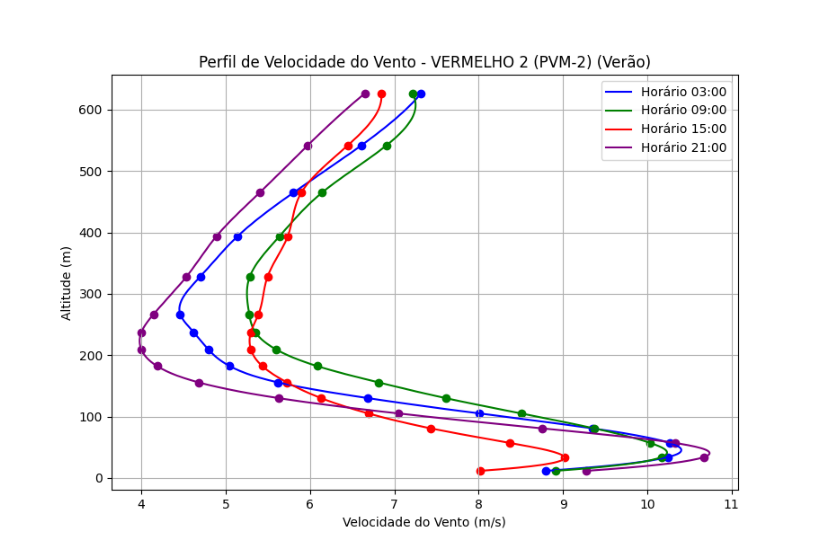

In [35]:
graficos_original_derivada('NAMORADO 2 (PNA-2)', 'Verão', 'original') # Gera o gráfico de velocidades da plataforma NAMORADO 2 (PNA-2) na estação Verão

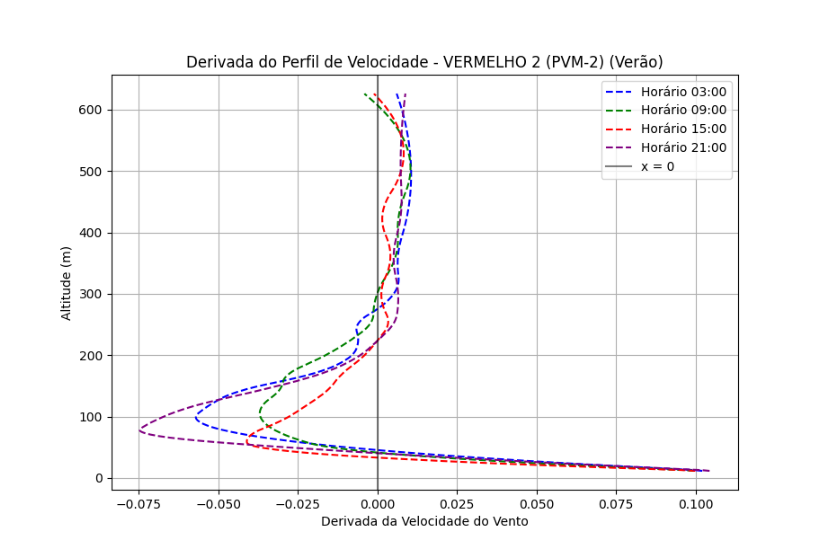

In [36]:
graficos_original_derivada('NAMORADO 2 (PNA-2)', 'Verão', 'derivada') # Gera o gráfico da derivada da velocidade da plataforma NAMORADO 2 (PNA-2) na estação Verão

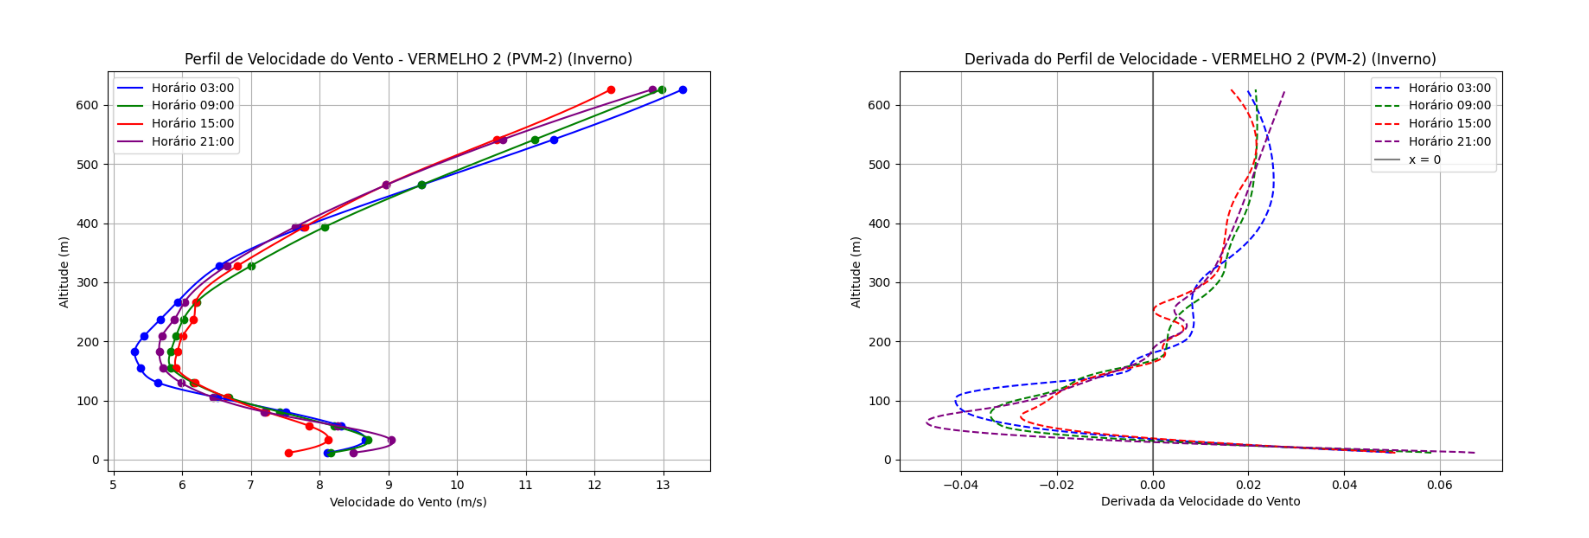

In [37]:
graficos_original_derivada('NAMORADO 2 (PNA-2)', 'Inverno', 'ambas') # Gera os dois gráficos (original e derivada) da plataforma NAMORADO 2 (PNA-2) na estação Verão
#*'ambas' é o argumento default e não é obrigatório especificar

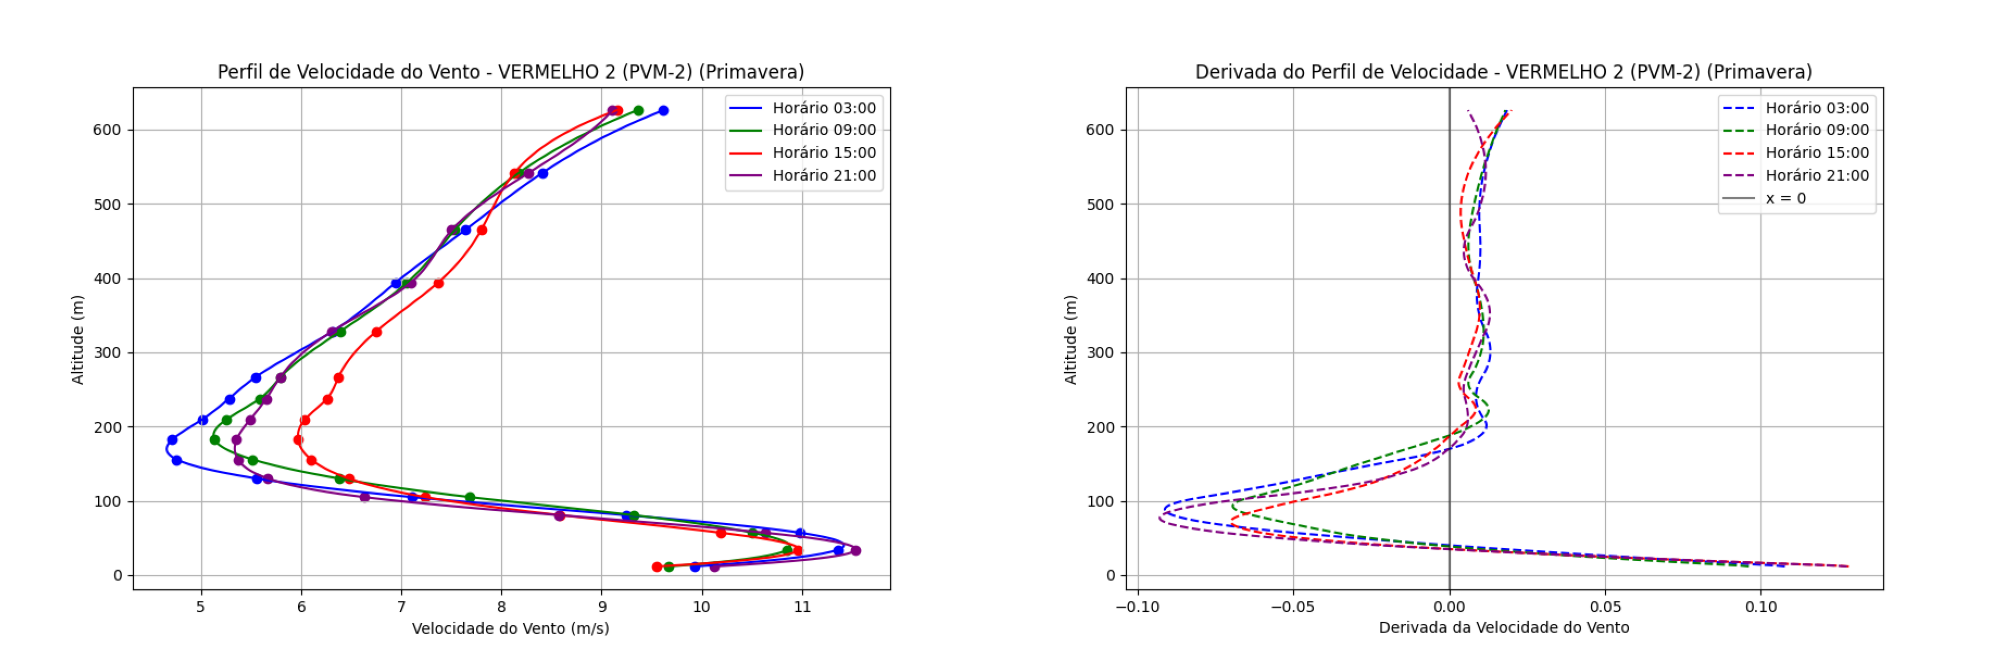

In [41]:
#Também é possível alterar a largura e altura dos gráficos:
graficos_original_derivada('NAMORADO 2 (PNA-2)', 'Primavera', 'ambas', largura=20, altura=50)

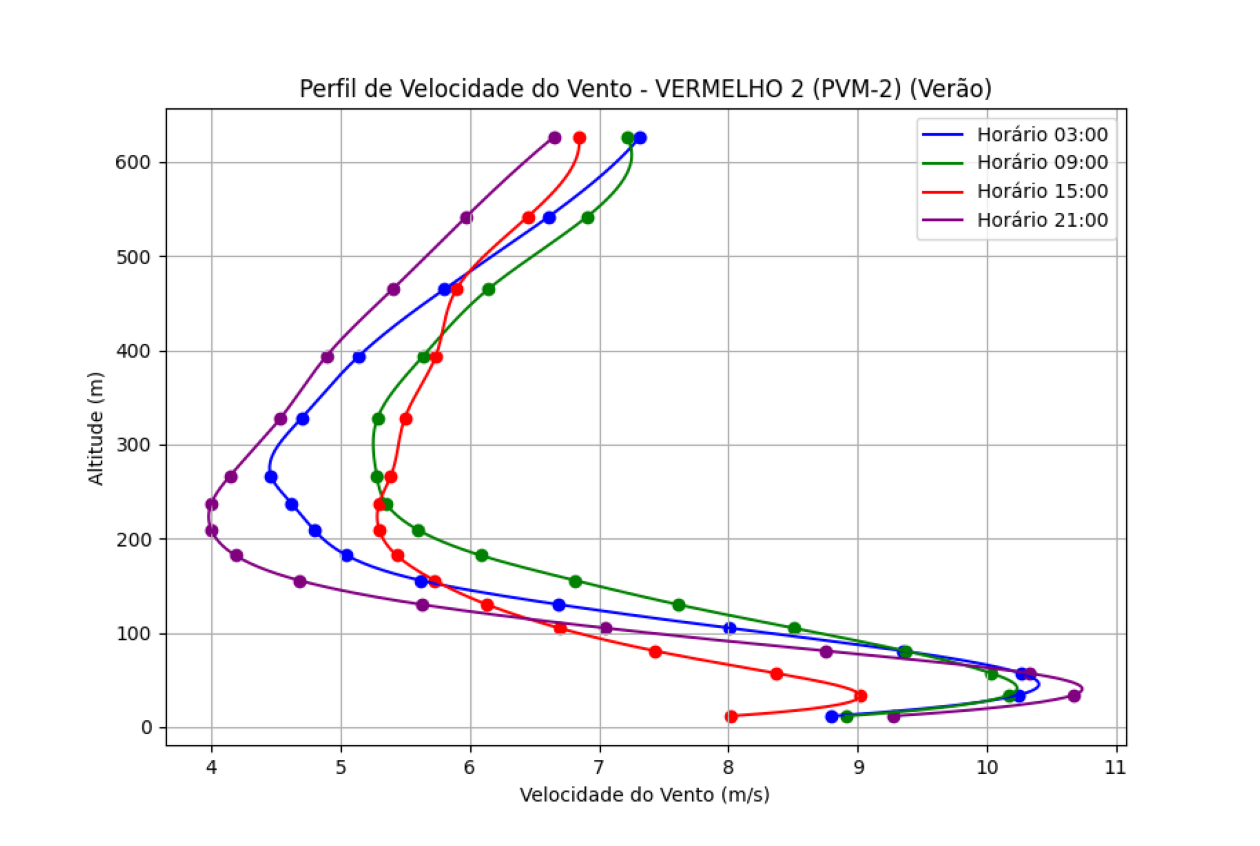

In [39]:
#Também é possível simplificar o uso do nome das plataformas, segundo a legenda:
#'NAMORADO 2 (PNA-2)':'p1'
#'PETROBRAS 26 (P-26)':'p2'
#'PETROBRAS 32 (P-32)': 'p3'
#'PETROBRAS 37 (P-37)': 'p4'
#'PETROBRAS IX': 'p5'
#'PETROBRAS XIX': 'p6'
#'PETROBRAS XXXIII': 'p7'
#'VERMELHO 1 (PVM-1)': 'p8'
#'VERMELHO 2 (PVM-2)': 'p9'

graficos_original_derivada('p5', 'Verão', 'original', altura=60)

In [40]:
# Para exibir uma figura armazenada
figura_1 = graficos_plataformas['NAMORADO 2 (PNA-2)']['Verão']['grafico']
figura_2 = graficos_plataformas['NAMORADO 2 (PNA-2)']['Verão']['grafico_derivada']
if figura is not None:
    display(figura_1)
    display(figura_2)
else:
    print("A figura não foi encontrada.")

KeyError: 'grafico'

In [ ]:
a = {'a': 1, 'b': 2}
a['a'] = 3
print(a)

print(graficos_plataformas)



In [ ]:
# Verifique o tipo do objeto armazenado
figura = graficos_plataformas['NAMORADO 2 (PNA-2)']['Verão']
print(f"Tipo de figura: {type(figura)}")

In [ ]:
print("Verificação das figuras armazenadas:")
for plataforma, estacoes in graficos_plataformas.items():
    for estacao, figura in estacoes.items():
        print(f"Plataforma: {plataforma}, Estação: {estacao}, Figura: {figura}")

In [ ]:
'''def exibir_grafico(figura, largura, altura):
    """Função auxiliar para exibir um gráfico com tamanho ajustável."""
    figura_unica, ax = plt.subplots(figsize=(largura, altura))
    canvas = FigureCanvas(figura_unica)
    canvas.draw()
    ax.imshow(canvas.renderer.buffer_rgba())
    ax.axis('off')  # Desativa os eixos
    plt.show()


def graficos_original_derivada(plataforma, estacao, tipo='ambas', largura=15, altura=20):

  figura_original = graficos_plataformas[plataforma][estacao]['grafico']
  figura_derivada = graficos_plataformas[plataforma][estacao]['grafico_derivada']

  if tipo == 'original':
    display(figura_original, largura, altura)

  elif tipo == 'derivada':
    display(figura_derivada, largura, altura)

  elif tipo == 'ambas':

    # Cria uma nova figura com dois subplots
    figura_combinada, (ax1, ax2) = plt.subplots(1, 2, figsize=(largura, altura))

    # Desenha as figuras nos subplots
    for ax, fig in zip([ax1, ax2], [figura_1, figura_2]):
        canvas = FigureCanvas(fig)
        canvas.draw()
        ax.imshow(canvas.renderer.buffer_rgba())
        #ax.axis('off')  # Desativa os eixos

    # Ajusta o layout
    plt.tight_layout()

    # Exibe a figura combinada
    plt.show()
'''